# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [36]:
# Resolver acá
import requests
buscar = "Barritas proteicas"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))
# obtenemos la response
response = requests.request("GET", url)
print("Estado de la respuesta:", response.status_code) # correcto

#texto
print("Texto de la respuesta:")
print (response.text)

Estado de la respuesta: 200
Texto de la respuesta:
{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"Barritas proteicas","paging":{"total":55,"primary_results":55,"offset":0,"limit":50},"results":[{"id":"MLA1311326159","title":"Barritas Proteicas Veganas Pont Smartbased Caja X 12 U. 70g","condition":"new","thumbnail_id":"714365-MLA53305112607_012023","catalog_product_id":"MLA23748474","listing_type_id":"gold_special","sanitized_title":"barritas-proteicas-veganas-pont-smartbased-caja-x-12-u-70g","permalink":"https://articulo.mercadolibre.com.ar/MLA-1311326159-barritas-proteicas-veganas-pont-smartbased-caja-x-12-u-70g-_JM","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA8830","domain_id":"MLA-SUPPLEMENTS","thumbnail":"http://http2.mlstatic.com/D_714365-MLA53305112607_012023-I.jpg","currency_id":"ARS","order_backend":1,"price":28727.05,"original_price":30239,"sale_price":{"price_id":"","amount":28727.05,"conditions":{"eligible":true,"context_restrictions":["ch

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [38]:
# Resolver acá
import pandas as pd
#obtengo los precios de los ítems en un dataframe
data = response.json()['results']
precios = [item['price'] for item in data]
df_precios = pd.DataFrame(precios, columns=['Precio'])

#calculo 
precio_promedio = df_precios['Precio'].mean()
precio_minimo = df_precios['Precio'].min()
precio_maximo = df_precios['Precio'].max()

print("Precio promedio:", precio_promedio)
print("Precio mínimo:", precio_minimo)
print("Precio máximo:", precio_maximo)



Precio promedio: 40161.4366
Precio mínimo: 2751.0
Precio máximo: 149669.0


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

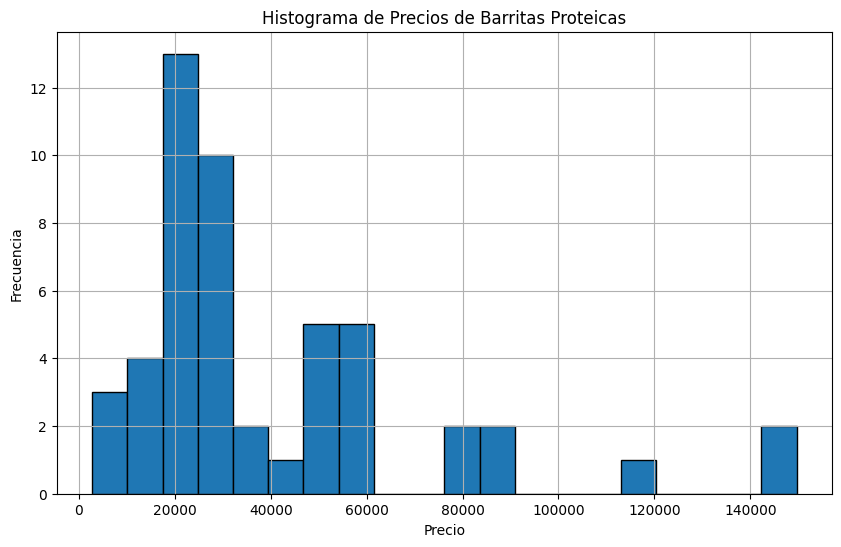

In [39]:
# Resolver acá
import matplotlib.pyplot as plt

#Grafico histograma de precios barritas
plt.figure(figsize=(10, 6))
plt.hist(df_precios['Precio'], bins=20, edgecolor='black')
plt.title('Histograma de Precios de Barritas Proteicas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True) #cuadricula
plt.show()

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [16]:
# Resolver acá
categoria_id = "MLA5725"  #categoría "Accesorios para Vehículos"
url_categoria = f"https://api.mercadolibre.com/sites/MLA/search?category={categoria_id}"

#request y obtener la respuesta
response_categoria = requests.request("GET", url_categoria)
data_categoria = response_categoria.json()['results']

#análisis: porcentaje de productos con envío gratis
envio_gratis = [item['shipping']['free_shipping'] for item in data_categoria]
porcentaje_envio_gratis = (sum(envio_gratis) / len(envio_gratis)) * 100

#resultados
print(f"Porcentaje de productos con envío gratis: {porcentaje_envio_gratis:.2f}%")

Porcentaje de productos con envío gratis: 84.00%


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [20]:
# Resolver acá
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.lanacion.com.ar/'

#Solitcitud a la pagina web la nacion
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')  #html

#Buscar Links noticias

links = []
for a_tag in soup.find_all('a', href=True):
    href = a_tag['href']
    if href.startswith('/'): #une al dominio, y si tiene el dominio se mantiene igual
        href = 'https://www.lanacion.com.ar' + href
    elif href.startswith('https://www.lanacion.com.ar'):
        pass #se omite los que no cumple con lo anterior
    else:
        continue
    links.append(href)

#Data frame con enlaces y se exporta a un archivo de excel usando pandas
df_links = pd.DataFrame(links, columns= ['links'])
df_links.to_excel('links_noticias.xlsx', index=False)
